In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Index(['Field_Name', 'CO2_kg_per_Ha', 'Total_Water_Applied_mm',
       'Crop_Protection_Application_Doses', 'Soil_Organic_Matter',
       'Yield_kg_per_Ha', 'N_as_Urea_kg_per_Ha', 'N_as_Nitrate_kg_per_Ha',
       'N_as_Ammonium_kg_per_Ha', 'P_as_Phosphorus_kg_per_Ha',
       'P_as_P2O5_kg_per_Ha', 'K_as_Potassium_kg_per_Ha',
       'K_as_K2O_kg_per_Ha'],
      dtype='object')


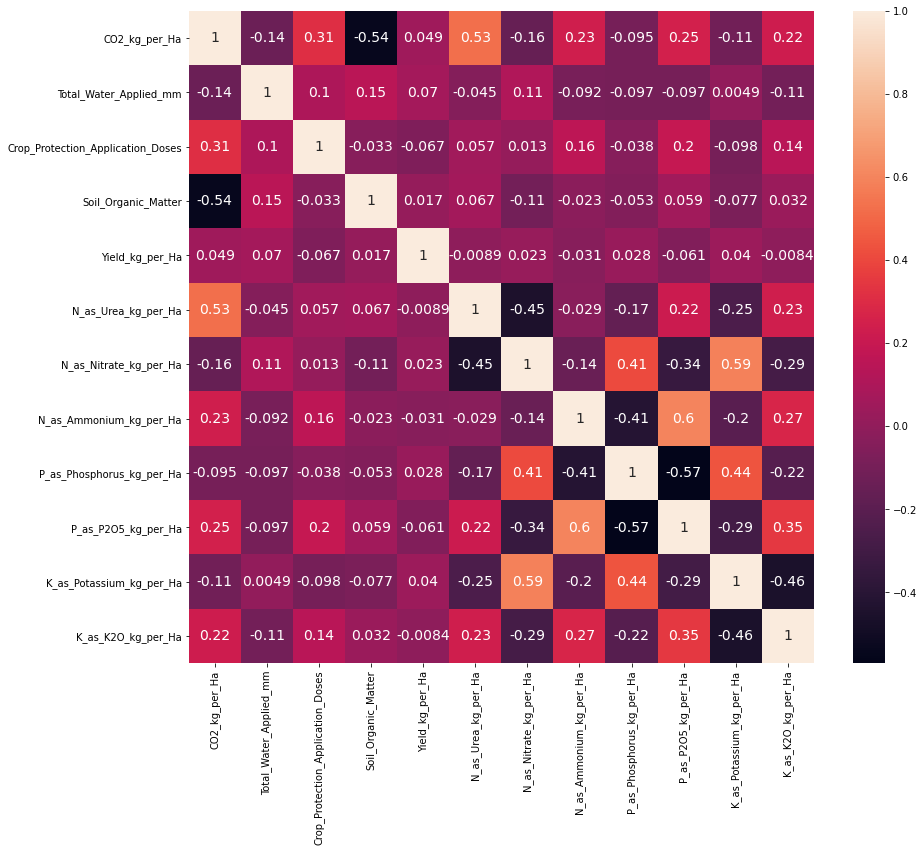

In [4]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
print(df.columns)
#subsetting by nitrate
corr_matrix = df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()
# print(display(df))

Text(0.5, 1.0, 'K2O vs. Yield')

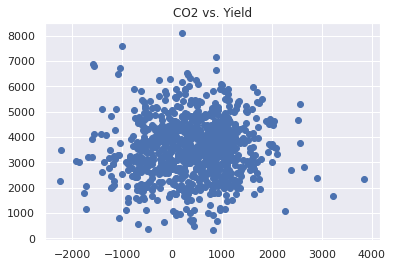

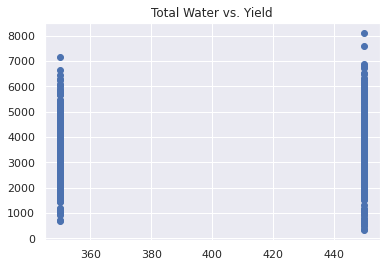

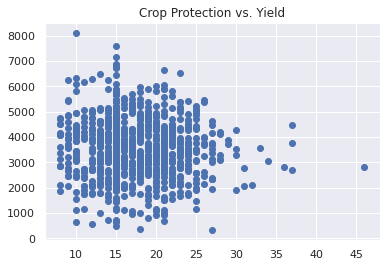

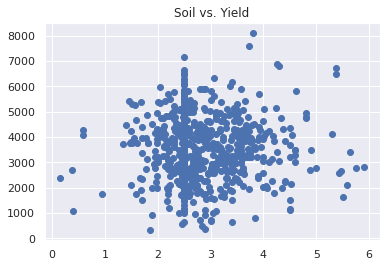

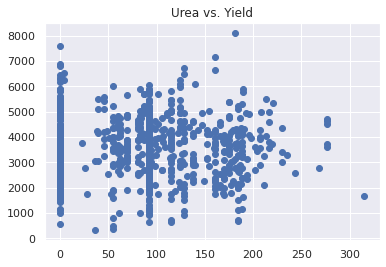

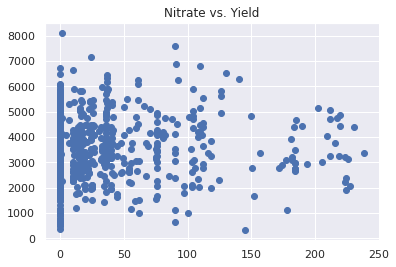

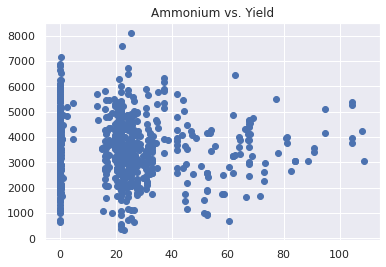

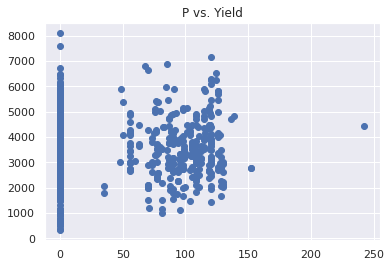

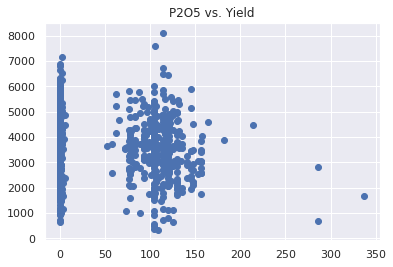

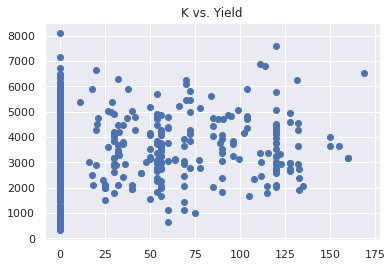

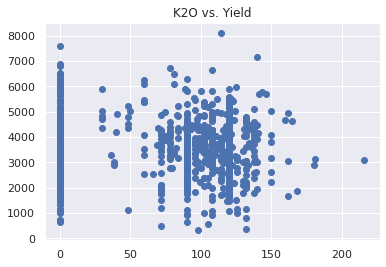

In [23]:
plt.figure()
plt.scatter(df['CO2_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('CO2 vs. Yield')

plt.figure()
plt.scatter(df['Total_Water_Applied_mm'], df['Yield_kg_per_Ha'])
plt.title('Total Water vs. Yield')

plt.figure()
plt.scatter(df['Crop_Protection_Application_Doses'], df['Yield_kg_per_Ha'])
plt.title('Crop Protection vs. Yield')

plt.figure()
plt.scatter(df['Soil_Organic_Matter'], df['Yield_kg_per_Ha'])
plt.title('Soil vs. Yield')

plt.figure()
plt.scatter(df['N_as_Urea_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('Urea vs. Yield')

plt.figure()
plt.scatter(df['N_as_Nitrate_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('Nitrate vs. Yield')

plt.figure()
plt.scatter(df['N_as_Ammonium_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('Ammonium vs. Yield')

plt.figure()
plt.scatter(df['P_as_Phosphorus_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('P vs. Yield')

plt.figure()
plt.scatter(df['P_as_P2O5_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('P2O5 vs. Yield')

plt.figure()
plt.scatter(df['K_as_Potassium_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('K vs. Yield')

plt.figure()
plt.scatter(df['K_as_K2O_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.title('K2O vs. Yield')

n = 871


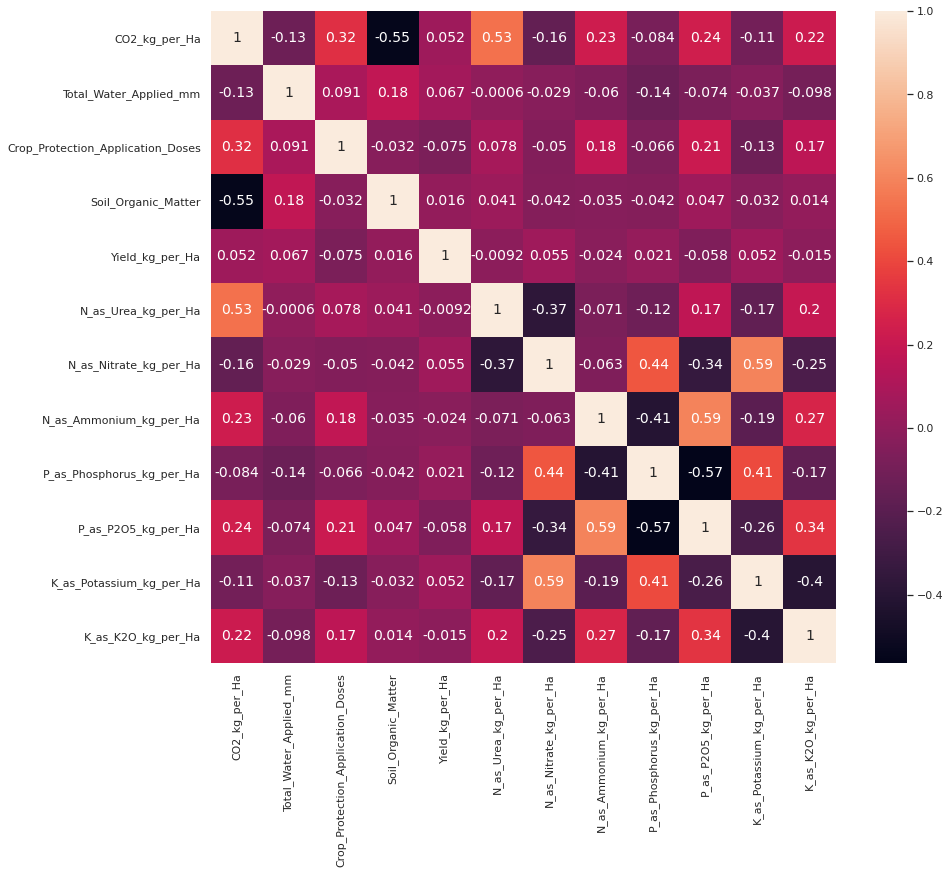

n = 49


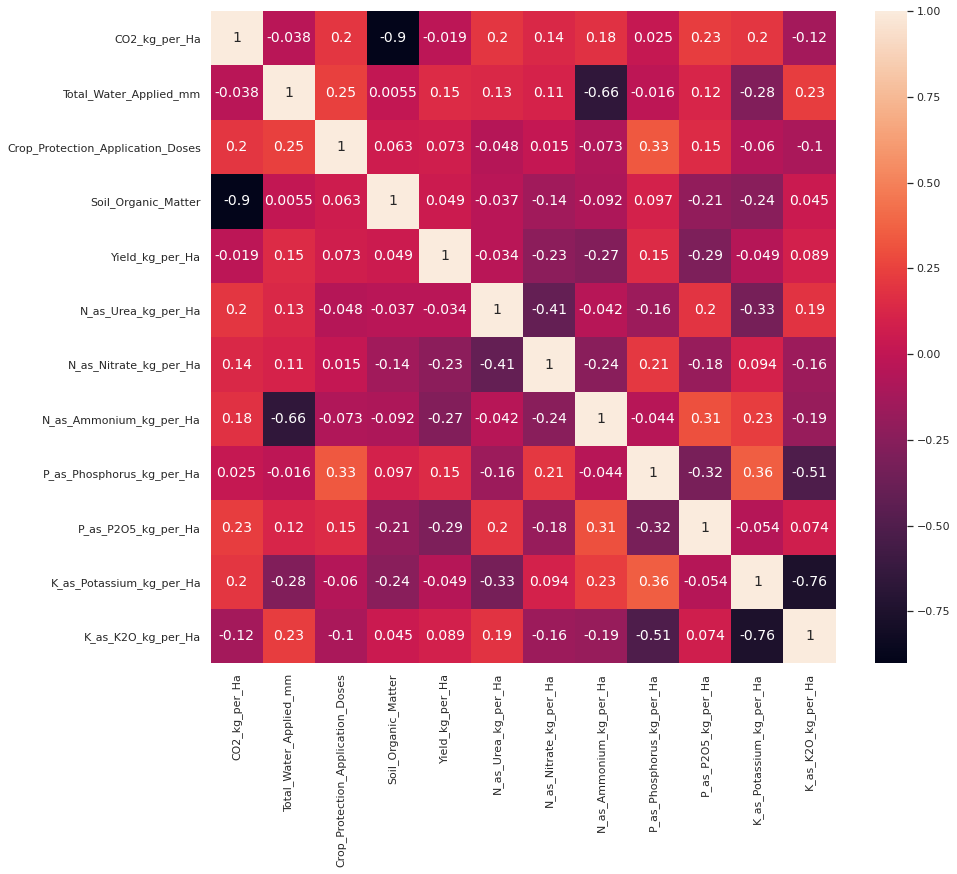

In [21]:
import pandas as pd
import scipy as sp
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

#subsetting by nitrate
corr_matrix = df[df['N_as_Nitrate_kg_per_Ha'] < 125].corr()
print('n = ' + str(len(df[df['N_as_Nitrate_kg_per_Ha'] < 125])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

corr_matrix = df[df['N_as_Nitrate_kg_per_Ha'] >= 125].corr()
print('n = ' + str(len(df[df['N_as_Nitrate_kg_per_Ha'] >= 125])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

n = 505


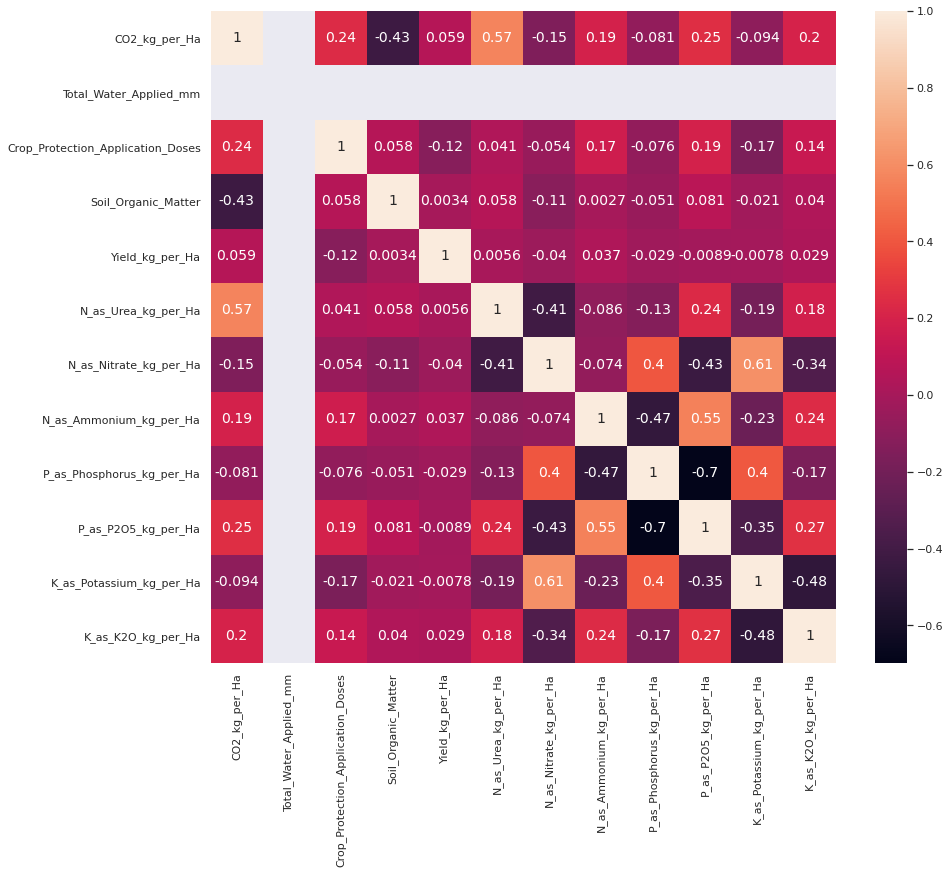

n = 415


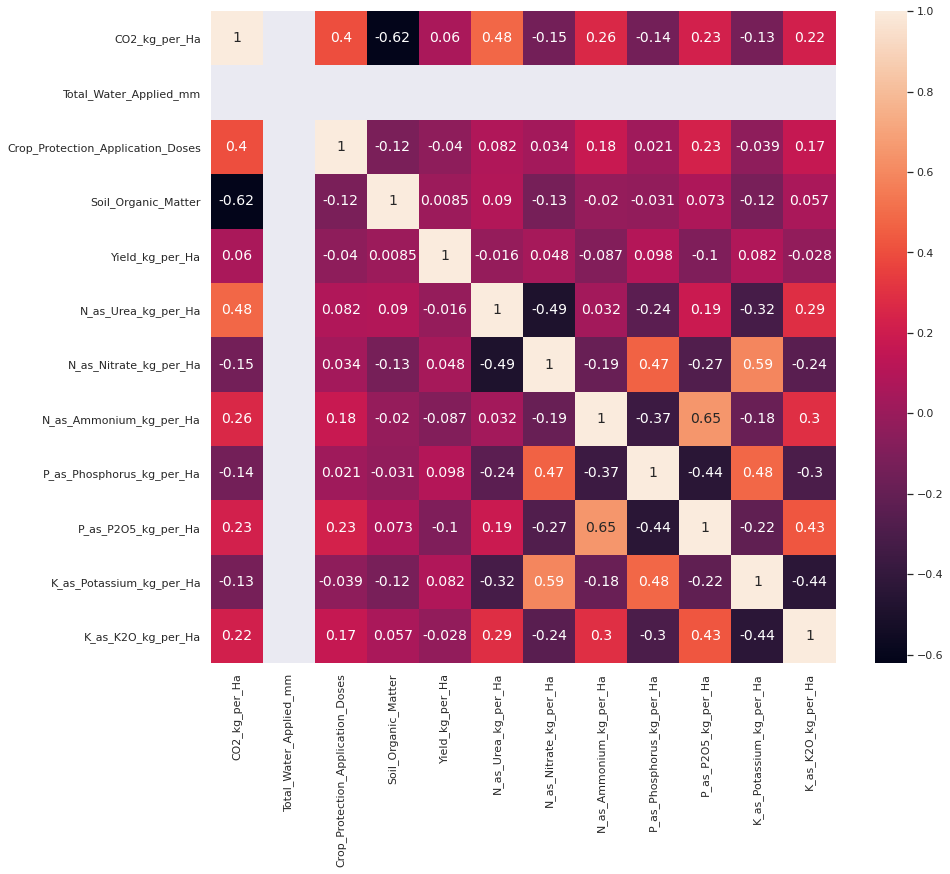

In [22]:
#subsetting by water
corr_matrix = df[df['Total_Water_Applied_mm'] == 350].corr()
print('n = ' + str(len(df[df['Total_Water_Applied_mm'] == 350])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

corr_matrix = df[df['Total_Water_Applied_mm'] == 450].corr()
print('n = ' + str(len(df[df['Total_Water_Applied_mm'] == 450])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

n = 906


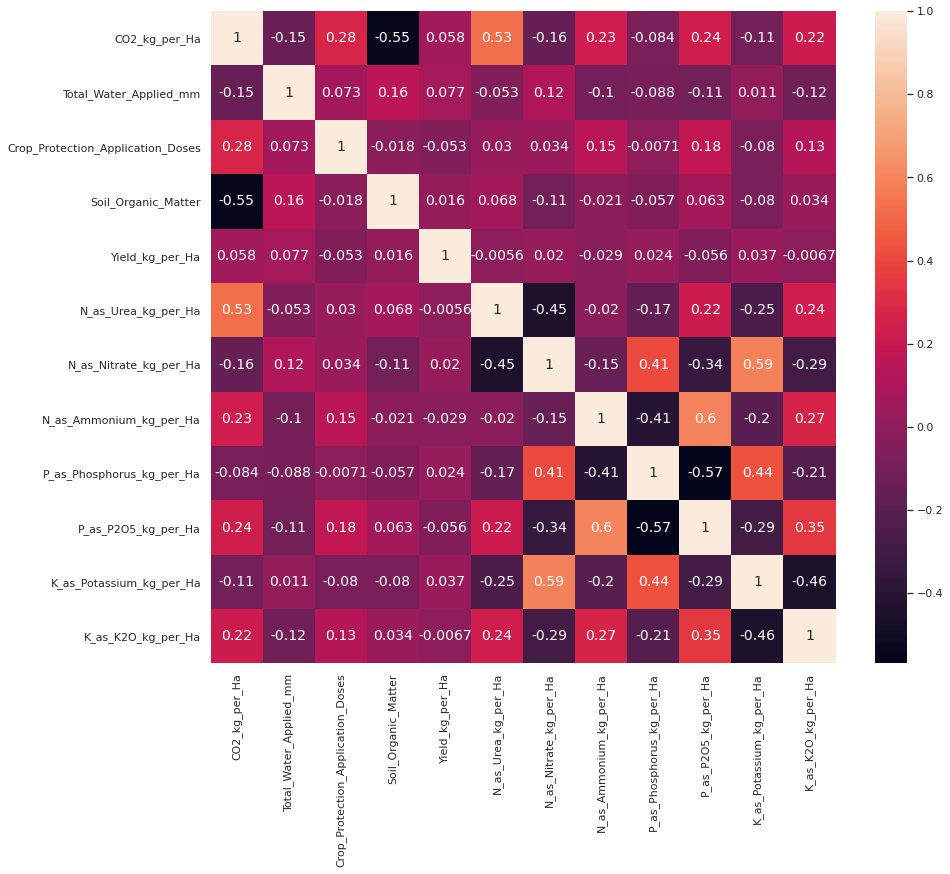

n = 14


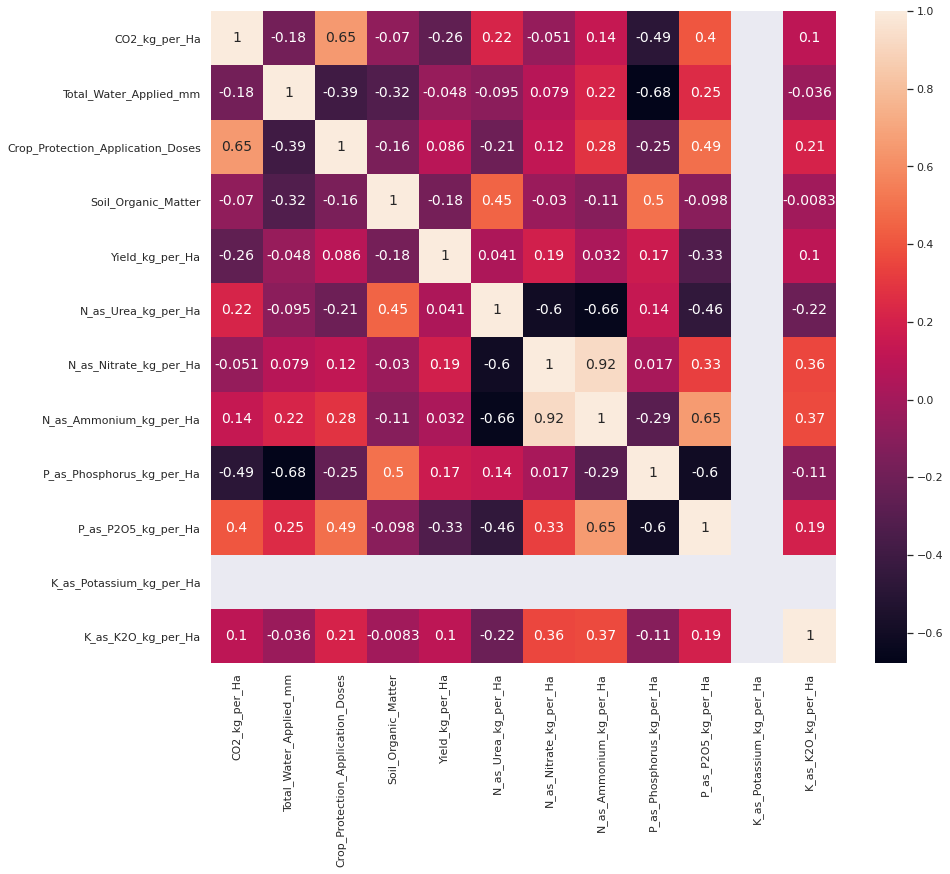

In [24]:
#subsetting by crop protection
corr_matrix = df[df['Crop_Protection_Application_Doses'] < 30].corr()
print('n = ' + str(len(df[df['Crop_Protection_Application_Doses'] < 30])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

corr_matrix = df[df['Crop_Protection_Application_Doses'] >= 30].corr()
print('n = ' + str(len(df[df['Crop_Protection_Application_Doses'] >= 30])))
plt.figure(figsize = (14, 12))
sn.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sn.set(font_scale = 1)
plt.show()

In [5]:
###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [7]:
print(X_train_Yield_kg_per_ha.shape)

(736, 11)


(array([ 4.,  8., 10., 15., 36., 45., 68., 88., 91., 91., 91., 63., 55.,
        30., 23., 10.,  4.,  2.,  1.,  1.]),
 array([-2.92079334, -2.6012502 , -2.28170707, -1.96216394, -1.6426208 ,
        -1.32307767, -1.00353453, -0.6839914 , -0.36444827, -0.04490513,
         0.274638  ,  0.59418114,  0.91372427,  1.2332674 ,  1.55281054,
         1.87235367,  2.1918968 ,  2.51143994,  2.83098307,  3.15052621,
         3.47006934]),
 <BarContainer object of 20 artists>)

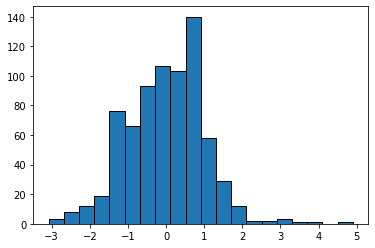

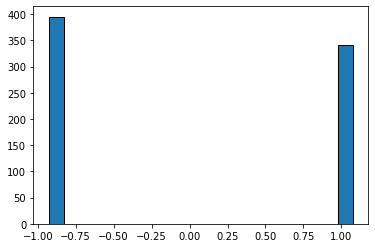

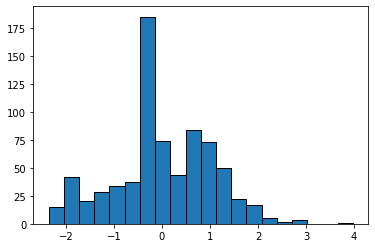

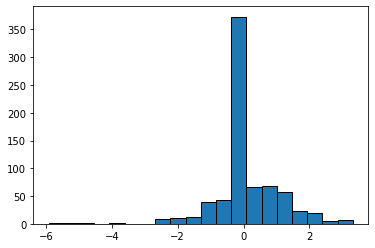

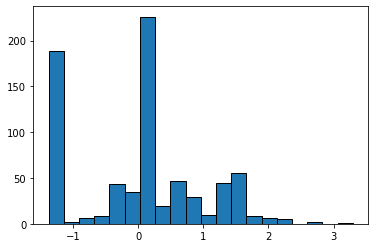

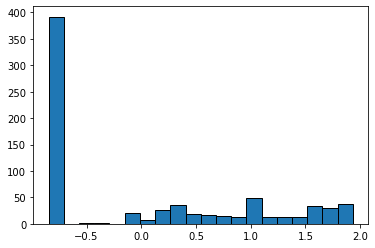

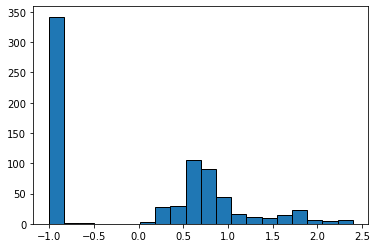

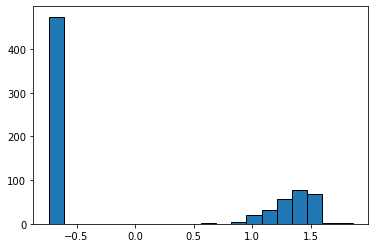

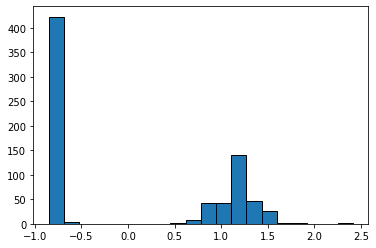

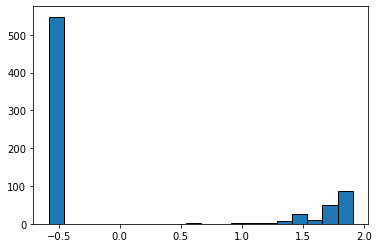

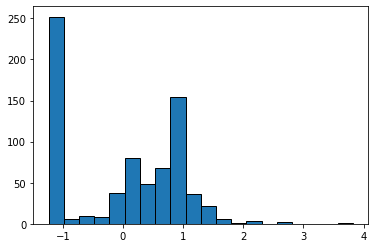

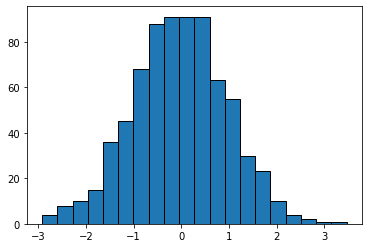

In [10]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#create histogram to visualize values in dataset
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,0], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,1], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,2], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,3], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,4], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,5], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,6], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,7], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,8], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,9], edgecolor='black', bins=20)
plt.figure()
plt.hist(X_train_Yield_kg_per_ha[:,10], edgecolor='black', bins=20)
plt.figure()
plt.hist(y_train_Yield_kg_per_ha, edgecolor='black', bins=20)

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> mar

<Figure size 432x288 with 0 Axes>

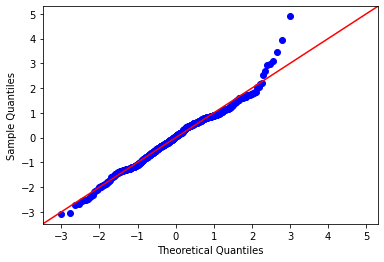

<Figure size 432x288 with 0 Axes>

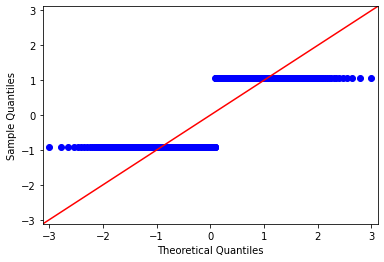

<Figure size 432x288 with 0 Axes>

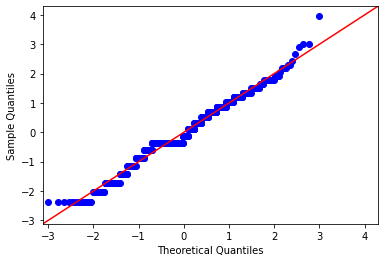

<Figure size 432x288 with 0 Axes>

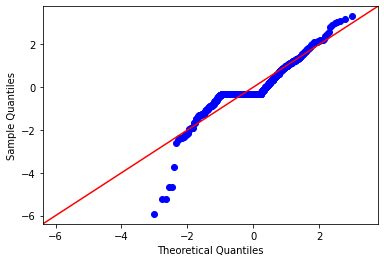

<Figure size 432x288 with 0 Axes>

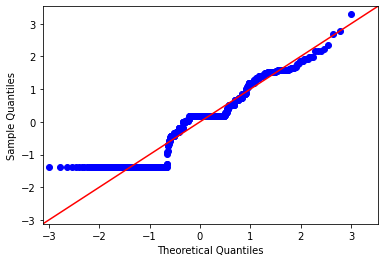

<Figure size 432x288 with 0 Axes>

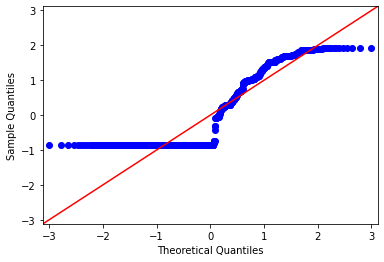

<Figure size 432x288 with 0 Axes>

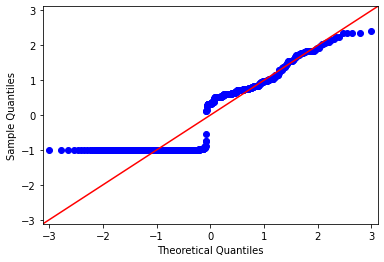

<Figure size 432x288 with 0 Axes>

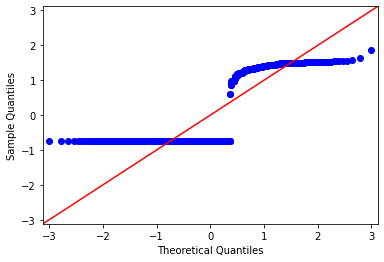

<Figure size 432x288 with 0 Axes>

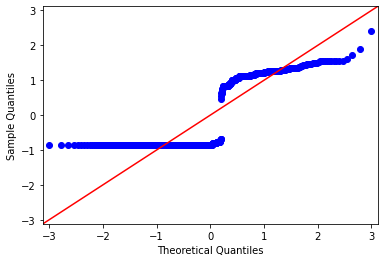

<Figure size 432x288 with 0 Axes>

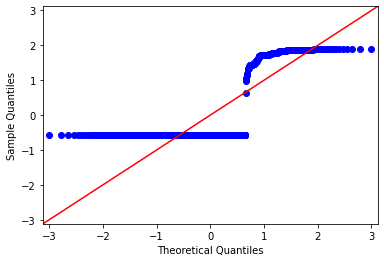

<Figure size 432x288 with 0 Axes>

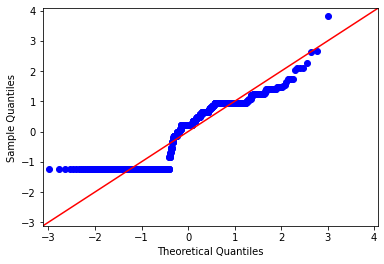

<Figure size 432x288 with 0 Axes>

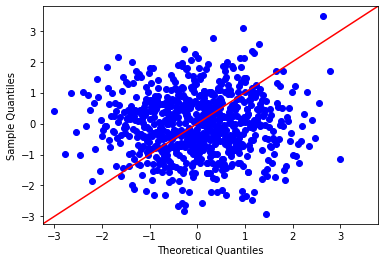

In [12]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,0], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,1], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,2], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,3], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,4], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,5], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,6], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,7], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,8], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,9], line='45')
plt.figure()
fig = sm.qqplot(X_train_Yield_kg_per_ha[:,10], line='45')
plt.figure()
fig = sm.qqplot(y_train_Yield_kg_per_ha, line='45')